# Using the PETITE utilities to generate new integrator maps
Authors: Kevin J. Kelly (Texas A&M), Nikita Blinov (U. Victoria), Ryan Plestid (Caltech), Patrick J. Fox (Fermilab), and Pedro A.N. Machado (Fermilab)

! Warning: running this can be time consuming !

* First we will generate all the Standard Model processes ('Brem', 'PairProd', 'Comp', 'Ann', 'Moller', 'Bhabha') for a range of energies.
* Second we will generate integrators for dark Bremsstrahlung for a range of dark vector masses



In [5]:
# import necessary functions
from generate_integrators import *
from find_maxes import *
import numpy as np
import sys, os
path = os.getcwd()
path = os.path.split(path)[0]
print(path)

/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/PETITE


In [2]:
import PETITE.all_processes as ap
import vegas as vg

In [11]:
process = "DarkMuonBrem"
int_option = ap.vegas_integrator_options[process]
#diff_xsec = dsigma_moller_dCT_fk
diff_xsec = ap.diff_xsection_options[process]
Ei = 2.0
params = {"E_inc":Ei, "m_lepton":m_muon, "mV":0.030, "mT":200.0, 'Z_T':1.0, 'A_T':1.0}

if not ("Eg_min" in params.keys()):
    params["Eg_min"] = 0.001
if not ("Ee_min" in params.keys()):
    params["Ee_min"] = 0.005
if not ("m_lepton" in params.keys()):
    params["m_lepton"] = m_electron

ig_r = ap.integration_range(params, process)
print(ig_r)

integ = vg.Integrator(ig_r)
f_integrand = diff_xsec(event_info=params, ndim=1, batch_mode=True)

[[0.015, 0.999744500525], [-12.0, 0.3010299956639812], [-20.0, 0.0]]


In [13]:
f_integrand(np.array([0.5, -8, -10.0]))

array(0.)

In [ ]:
integ(f_integrand, **int_option)

In [7]:
import pickle as pk
dark_xsec_dict = pk.load(open(path+"/data_test/data/dark_xsec.pkl", "rb"))

In [19]:
dark_xsec_dict[0.100]['DarkBrem'].keys()

dict_keys(['graphite', 'lead', 'iron', 'aluminum'])

In [26]:
dbx, dby = np.transpose(dark_xsec_dict[0.100]['DarkBrem']['iron'])
dmbx, dmby = np.transpose(dark_xsec_dict[0.100]['DarkMuonBrem']['iron'])

In [27]:
from kjkutils import *

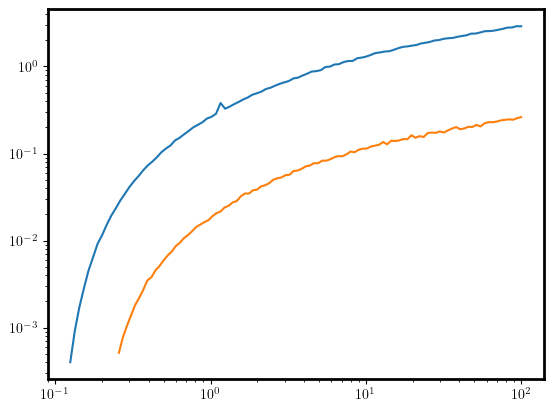

In [28]:
plt.plot(dbx, dby)
plt.plot(dmbx, dmby)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')